In [35]:
from stesml.model_tools import final_train
from stesml.model_tools import validate_model
from stesml.model_tools import get_h_from_T_results
from stesml.model_tools import get_T_from_h_results

from stesml.data_tools import load_data

from stesml.plot_tools import plot_test_results
from stesml.plot_tools import plot_average_error

import datetime

from tensorflow import keras
import xgboost as xgb

In [46]:
data_dir = "../data/Sulfur_Models/"
val_data_dir = "../data/Sulfur_Models/cooling/"
model_type = 'XGBoost' # Options: NN, XGBoost, RandomForest
target = 'h' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = False # Normalize data to a mean of 0 and STD of 1

In [26]:
if model_type == 'NN':
    parameters = {'n_layers': 1, 'n_hidden_units': 82, 'batch_size': 2809, 'epochs': 10} # rmse = 1.699, r2 = 0.9983
    #parameters = {'n_layers': 1, 'n_hidden_units': 46, 'batch_size': 4298} # rmese = 2.06, r2 = 0.9976
elif model_type == 'XGBoost':
    parameters = {'learning_rate': 0.06600212850505194, 'subsample': 0.6242681848206246, 'colsample_bytree': 0.7982472652709917, 'num_boost_round': 160} # rmse = 4.5927
elif model_type == 'RandomForest':
    parameters = {'n_estimators': 2}

In [27]:
if scale:
    model, scaler_x, scaler_y = final_train(data_dir, model_type, target, scale, parameters)
else:
    model = final_train(data_dir, model_type, target, scale, parameters)

[19:23:59] WARNING: ../src/learner.cc:576: 
Parameters: { "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-rmse:66.05218
[20]	train-rmse:21.68010
[40]	train-rmse:9.50539
[60]	train-rmse:4.25239
[80]	train-rmse:2.65901
[100]	train-rmse:2.19902
[120]	train-rmse:1.97133
[140]	train-rmse:1.84885
[159]	train-rmse:1.78270


In [47]:
sv = False
ld = True

In [48]:
if sv:
    if model_type == 'NN':
        model.save("../models/" + model_type + "_" + datetime.datetime.now().strftime("%Y%m%d-%H"))
    elif model_type == 'XGBoost':
        model.save_model("../models/" + model_type + "_" + datetime.datetime.now().strftime("%Y%m%d-%H") + ".json")
elif ld:
    if model_type == 'NN':
        model = keras.models.load_model("../models/NN_20220701-19")
    elif model_type == 'XGBoost':
        model = xgb.Booster()
        model.load_model("../models/XGBoost_20220701-19.json")

In [49]:
if scale:
    results = validate_model(model, model_type, val_data_dir, target, scale, scaler_x, scaler_y)
else:
    results = validate_model(model, model_type, val_data_dir, target, scale)

RMSE: 153.0554, R2: -5.2040


In [50]:
val_df = results['val_df']

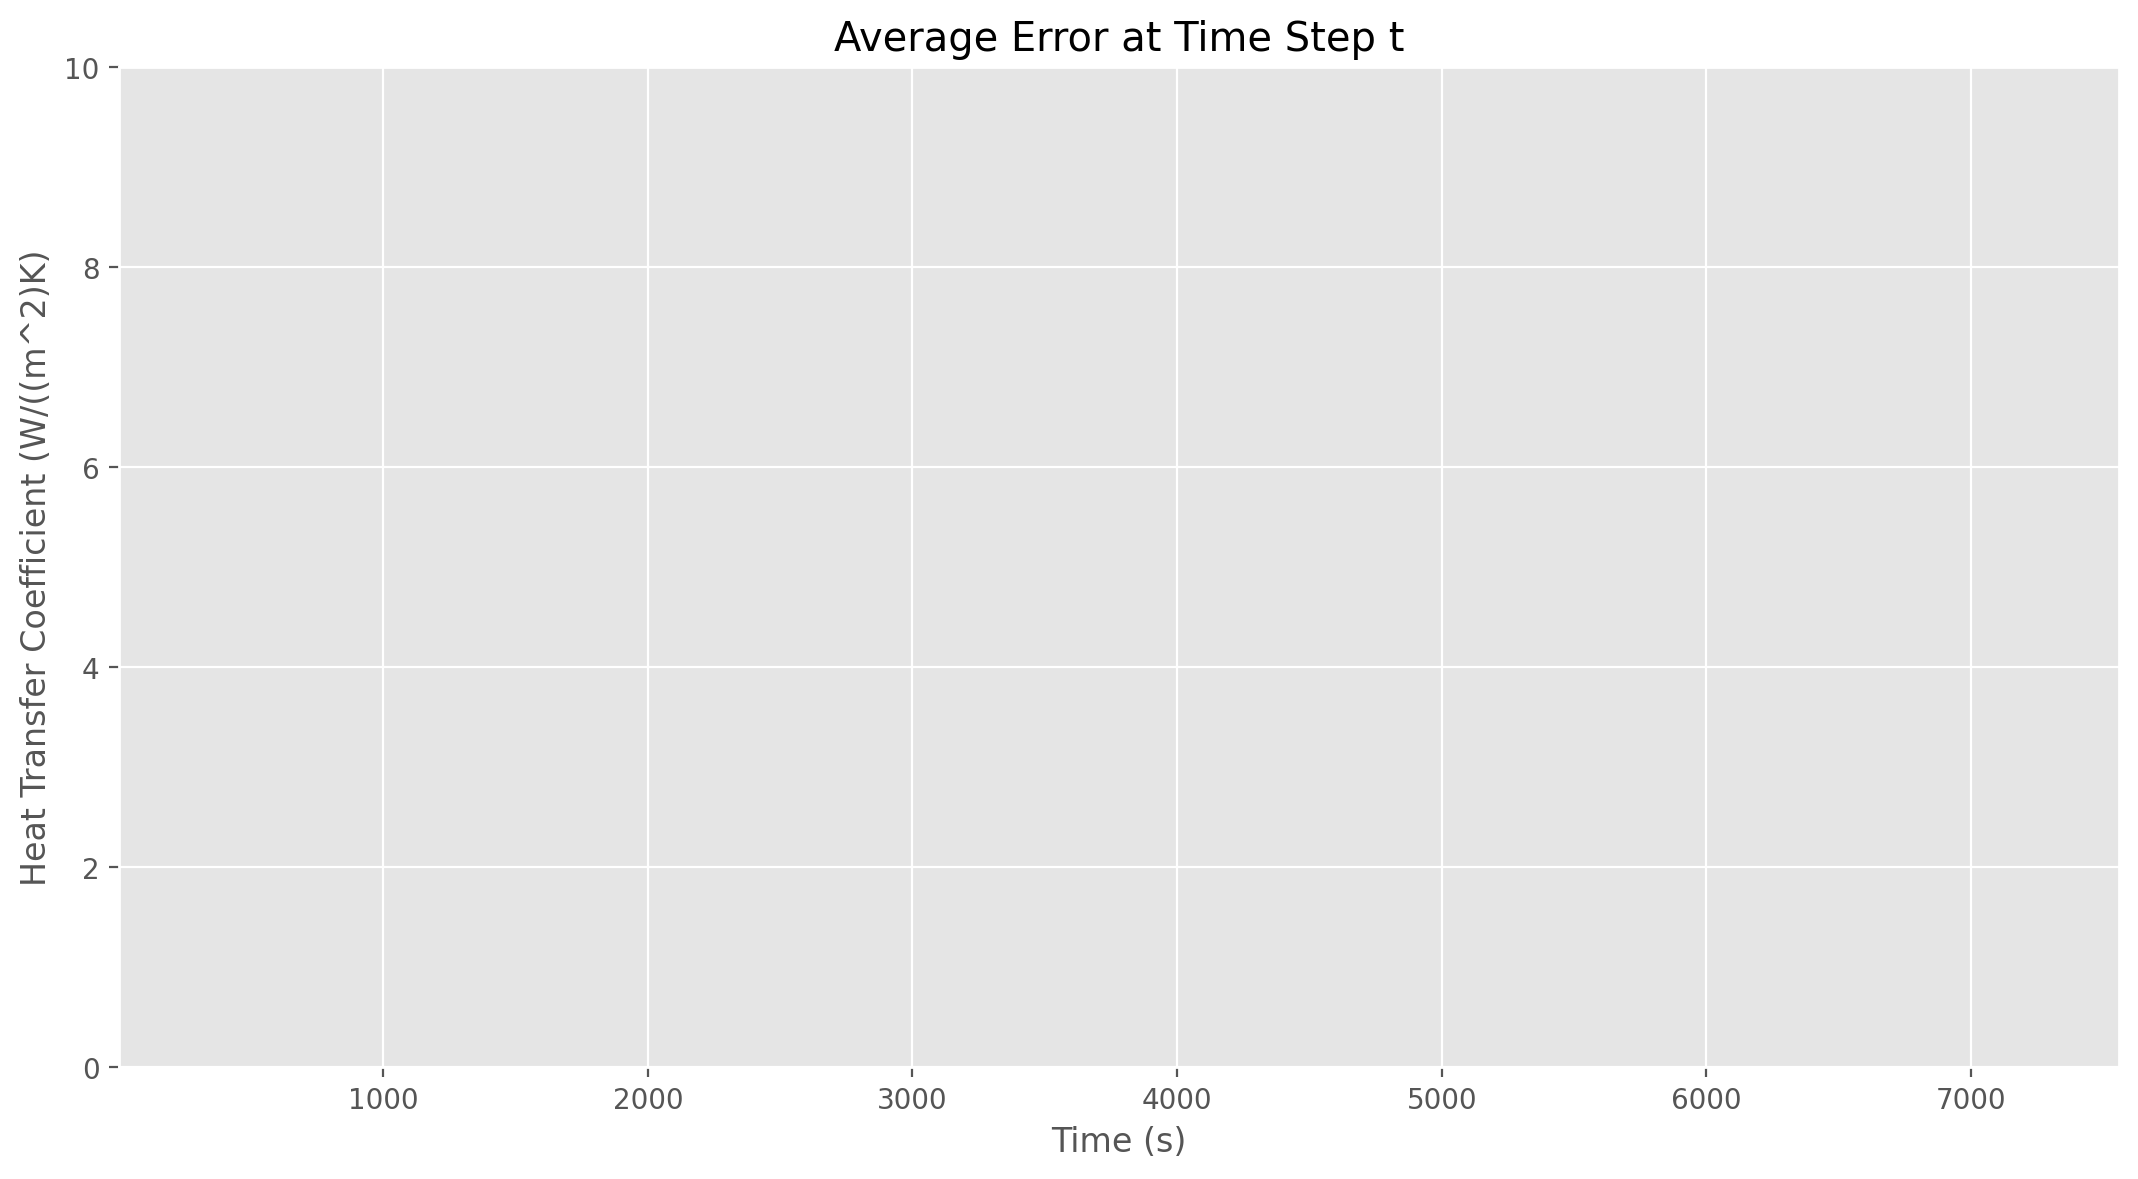

In [51]:
avg_error = plot_average_error(val_df, target=target)

<AxesSubplot:>

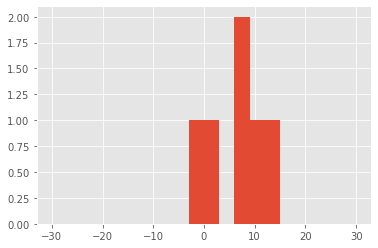

In [52]:
(val_df[target] - val_df[target+'_hat']).hist(bins=20, range=(-30, 30))

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/plot_tools.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


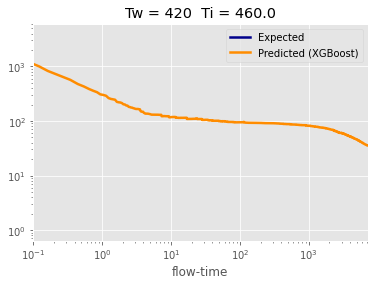

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/plot_tools.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


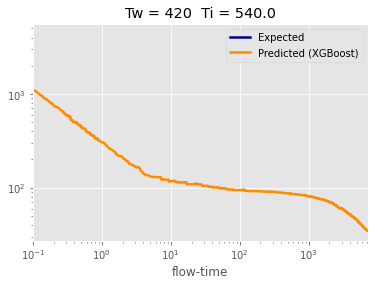

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/plot_tools.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


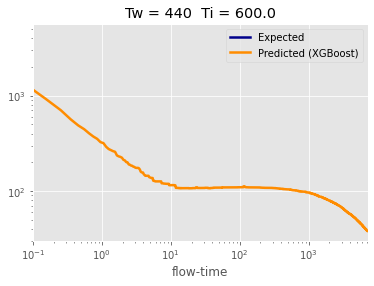

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/plot_tools.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


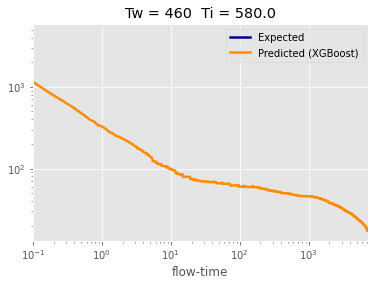

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/plot_tools.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


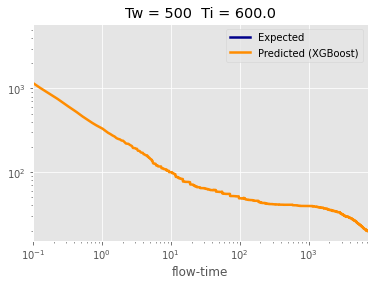

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/plot_tools.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


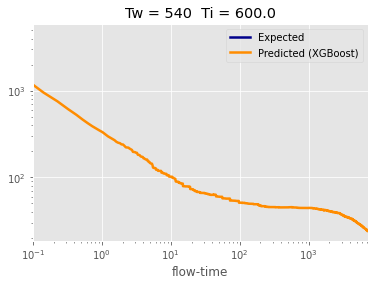

In [53]:
plot_test_results(val_df, model_type, target)

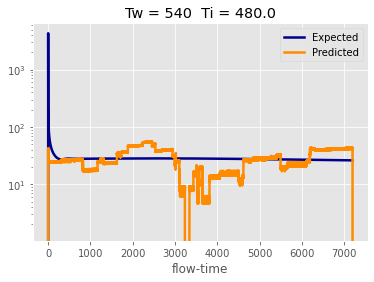

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/postprocessing_tools.py:53: RuntimeWarning: invalid value encountered in true_divide


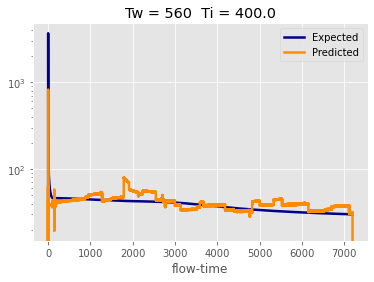

In [20]:
if target == 'Tavg':
    rmse, r2 = get_h_from_T_results(val_df, plot=True)
else:
    rmse, r2 = get_T_from_h_results(val_df, plot=True)

In [21]:
print(rmse)

57.8082603887298


In [22]:
print(r2)

-0.019178348035739923
